instalamos dtale

In [35]:
!pip install dtale

     |████████████████████████████████| 11.4 MB 4.5 MB/s 
     |████████████████████████████████| 1.8 MB 35.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 642 kB 55.3 MB/s 
     |████████████████████████████████| 62 kB 863 kB/s 
     |████████████████████████████████| 7.3 MB 20.0 MB/s 
     |████████████████████████████████| 79.9 MB 88 kB/s 
     |████████████████████████████████| 47 kB 3.7 MB/s 
     |████████████████████████████████| 207 kB 65.5 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 23.9 MB 13 kB/s 
     |████████████████████████████████| 9.5 MB 18.1 MB/s 
     |████████████████████████████████| 357 kB 54.3 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=707a382ec505923e215386ad9d0af707844c4de29791195c27da28357cb9ef3a
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9

importamos las librerias que vamos a usar

In [38]:
import numpy as np
import pandas as pd
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

en la variable byke_sharing leemos el archivo csv day.csv que cargamos al proyecto y creamos un dataframe, de igual forma modificamos el nombre de sus columnas

In [29]:
byke_sharing = pd.read_csv("day.csv").rename(columns={
    "instant":"Serial",
    "dteday":"Fecha",
    "season":"estacion", #(1: invierno, 2: primavera, 3: verano, 4 : otoño)
    "yr":"año",
    "mnth":"mes",
    "holiday":"feriado",
    "weekday":"dia_semana",
    "workingday":"dia_laboral",
    "weathersit":"clima",
    "temp":"temp_norm",
    "atemp":"temp_sens",
    "hum":"humedad",
    "windspeed":"Vel_Viento",
    "casual":"usu_ocasion",
    "registered":"usu_registra",
    "cnt":"bici_alqui"
})

mostramos el dataframe que creamos a partir del archivo day.csv

In [30]:
byke_sharing

,Serial,Fecha,estacion,año,mes,feriado,dia_semana,dia_laboral,clima,temp_norm,temp_sens,humedad,Vel_Viento,usu_ocasion,usu_registra,bici_alqui
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


En esta linea podemos mirar algunos datos como la cantidad de registros, el promedio, la desviación estandar, el percentil 25, 50, 75 y 100. Todo para cada columna numerica del dataframe

In [31]:
byke_sharing.describe()

,Serial,estacion,año,mes,feriado,dia_semana,dia_laboral,clima,temp_norm,temp_sens,humedad,Vel_Viento,usu_ocasion,usu_registra,bici_alqui
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


en esta linea podemos observar el tipo de dato de cada columna

In [32]:
byke_sharing.dtypes

Serial            int64
Fecha            object
estacion          int64
año               int64
mes               int64
feriado           int64
dia_semana        int64
dia_laboral       int64
clima             int64
temp_norm       float64
temp_sens       float64
humedad         float64
Vel_Viento      float64
usu_ocasion       int64
usu_registra      int64
bici_alqui        int64
dtype: object

quitamos valores duplicados con la función de pandas drop_duplicates

In [33]:
byke_sharing = byke_sharing.drop_duplicates()

shape nos muestra la cantidad de filas y columnas respectivamente

In [34]:
byke_sharing.shape

(731, 16)

exploramos el dataframe a travez de la libreria dtale instalada

In [37]:
dtale.show(byke_sharing, ignore_duplicate=True)

2021-11-09 02:52:43,788 - INFO     - NumExpr defaulting to 2 threads.


https://hn9opjm9tz9-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

como podemos ver en la siguiente correlación los dias no laborales se aumenta la cantidad casi al doble de usuarios ocasionales que alquilan una bicicleta, esta es la correlación indirecta mas marcada en el dataset

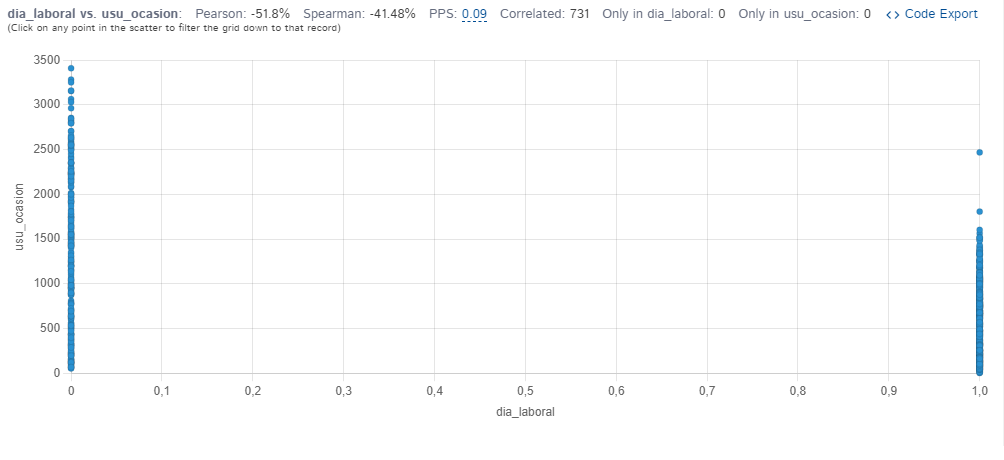

en esta segunda correlación podemos observar que hasta los 1500 usuarios ocasionales tenemos una cantidad de hasta poco mas de 8000 biciletas alquiladas en un dia, aun asi hemos llegado a tener mas de 3000 usuarios ocasioneles y no ha habido un cambio significativo en la cantidad de bicicletas alquiladas

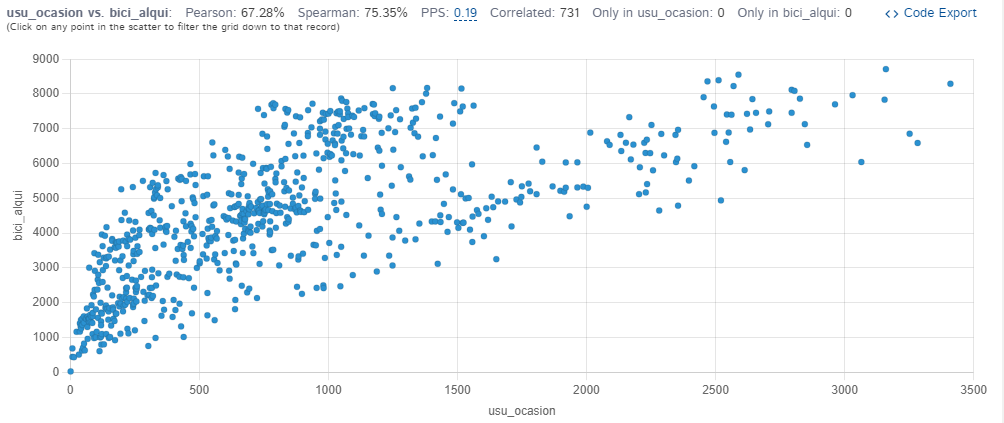

en el siguiente grafico podemos observar que la estación en la que mas se alquilaron bicicletas es verano con mas de 10 millones y la estación con menos alquileres es invierno, esto es claro ya que en invierno es dificil transitar por la nieve y en verano no existe problemas mayores para usar una bicicleta.

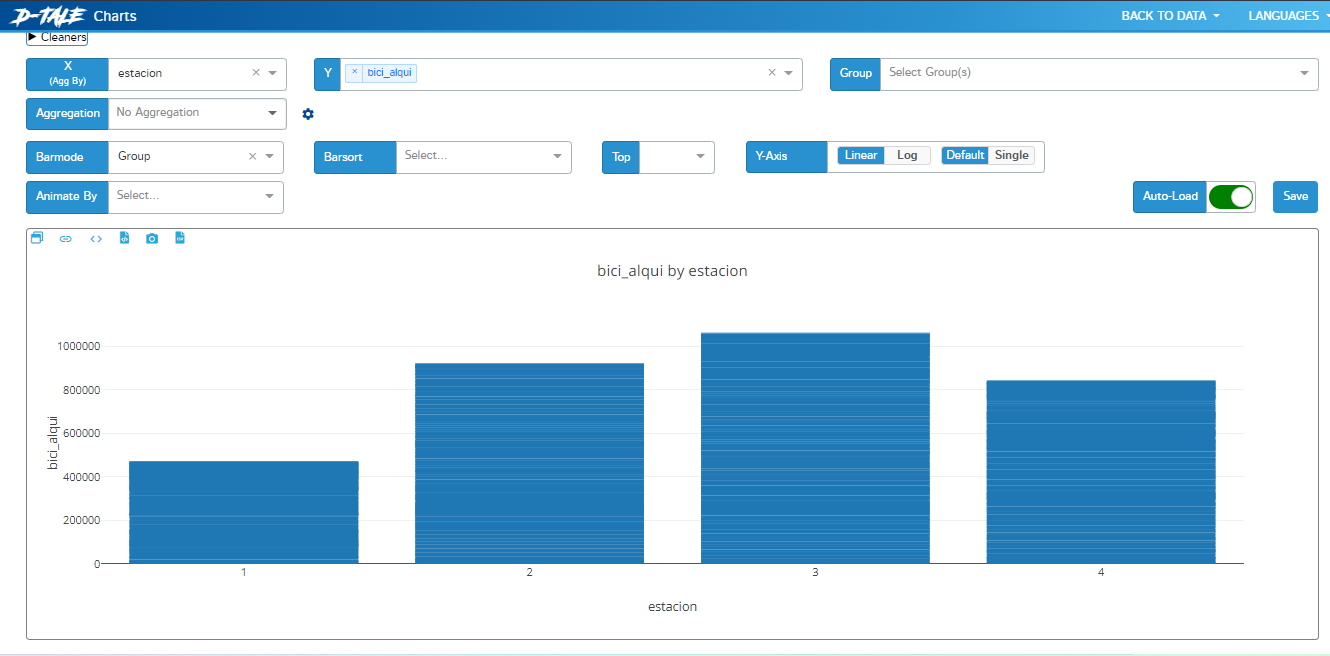

en el grafico de pie de color naranja observamos el porcentaje de bicicletas alquiladas en 2011 y en azul en el 2012, lo cual indica que es un total exito su funcionalidad al casi duplicar sus usuarios en 1 solo año de diferencia

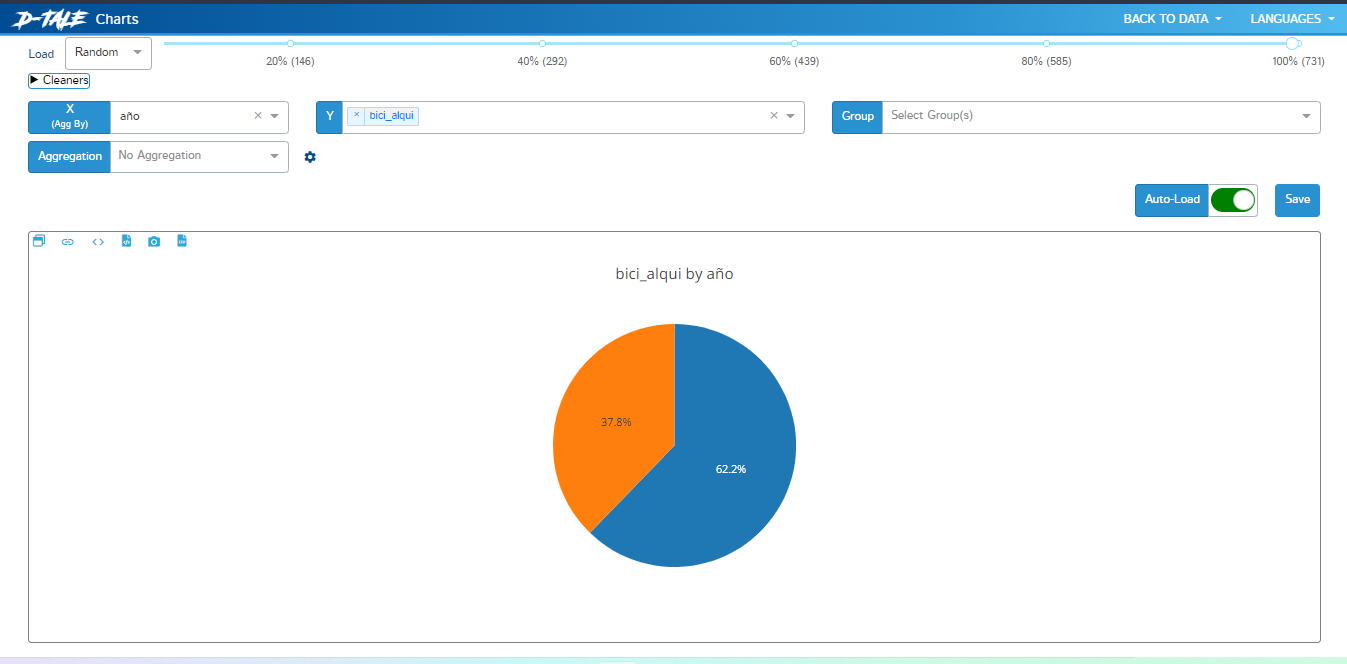